## Creando algunos datos sintéticos usando el generador de regresión integrado de scikit-learn

# Regresión de bosque aleatorio

Un [bosque aleatorio](https://en.wikipedia.org/wiki/Random_forest) es un metaestimador que se ajusta a varios [árboles de decisión](https://en.wikipedia.org/wiki/Decision_tree_learning) de clasificación  en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el ajuste excesivo. El tamaño de la submuestra es siempre el mismo que el tamaño de la muestra de entrada original, pero las muestras se extraen con reemplazo (puede ser cambiado por el usuario).

Generalmente, los modelos de árbol de decisión y bosque aleatorio se utilizan para la tarea de clasificación. Sin embargo, la idea de Random Forest como un metaestimador de regularización sobre un árbol de decisión único se demuestra mejor aplicándolos a problemas de regresión. De esta manera se puede demostrar que, **en presencia de ruido aleatorio, el árbol de decisión único es propenso a sobreajustarse y aprender correlaciones falsas, mientras que un modelo de bosque aleatorio correctamente construido es más inmune a dicho sobreajuste.**

### Importando las bibliotecas

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [ ]:
# Importar el método make_regression para generar muestras de datos artificiales
from sklearn.datasets import make_regression

C:\Users\ulewi\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### ¿Qué es el método *make_regression*?

Es un método / función conveniente de scikit-learn estable para generar un problema de regresión aleatoria. El conjunto de entrada puede estar bien acondicionado (por defecto) o tener un perfil singular.

La salida se genera aplicando un modelo de regresión lineal aleatoria (potencialmente sesgado) con regresores "n_informative" distintos de cero a la entrada generada previamente y algo de ruido centrado en gauss con alguna escala ajustable.

In [ ]:
n_samples = 100 # Número de muestras
n_features = 6 # Número de características
n_informative = 3 # Número de características informativas i.e. características reales que influyen en la salida

In [ ]:
X, y,coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                       random_state=20, shuffle=False,noise=20,coef=True)
print(coef)

[78.58638696 97.72361019 52.30606265  0.          0.          0.        ]


### Creamos un dataframe y creamos visualizaciones básicas

#### Data Frame

In [ ]:
df1 = pd.DataFrame(data=X,columns=['X'+str(i) for i in range(1,n_features+1)])
df2=pd.DataFrame(data=y,columns=['y'])
df=pd.concat([df1,df2],axis=1)
df.head(10)

,X1,X2,X3,X4,X5,X6,y
0,0.883893,0.195865,0.357537,-2.343262,-1.084833,0.559696,109.512132
1,0.939469,-0.978481,0.503097,0.406414,0.323461,-0.493411,52.542242
2,-0.792017,-0.842368,-1.279503,0.245715,-0.044195,1.567633,-247.679018
3,1.051109,0.406368,-0.168646,-3.189703,1.120132,1.332778,98.678111
4,-0.243339,-0.130031,-0.109017,1.556186,0.128778,-2.066949,-55.286890
5,-0.885493,-1.104579,0.932866,2.059838,-0.934938,-1.612990,-94.821349
6,0.527070,-1.551101,0.329613,-1.136527,-0.338491,0.320971,-75.940071
7,-0.602308,1.544728,0.647034,0.593217,0.438024,1.357789,139.247064
8,1.204511,1.351796,0.493437,-2.704365,-0.555186,0.001509,246.470338
9,0.857094,1.481144,-0.219661,1.503398,-1.482385,-0.856164,204.709196


#### Scatter plots

In [ ]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


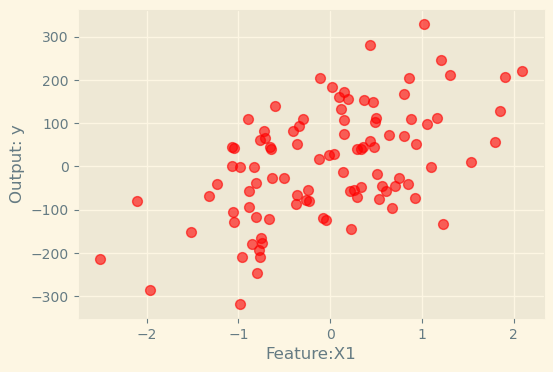

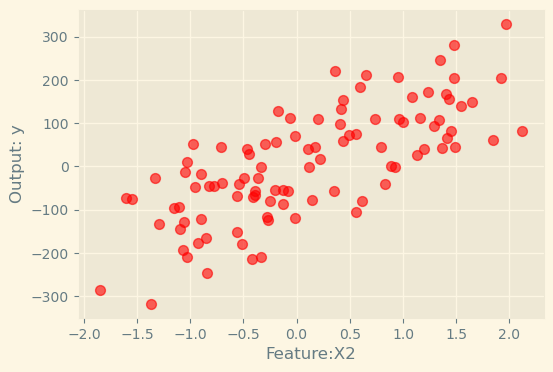

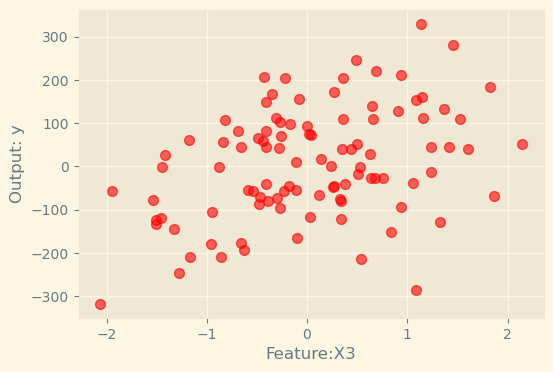

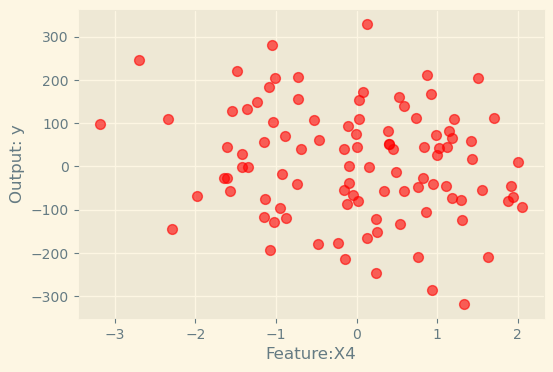

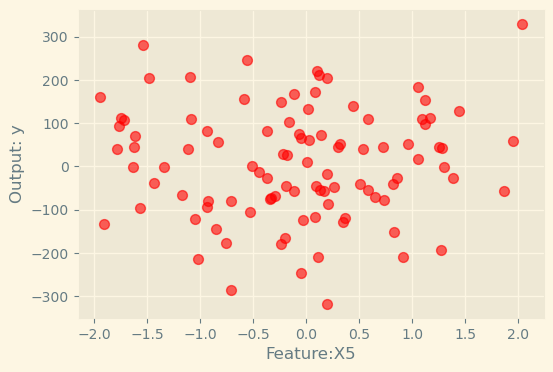

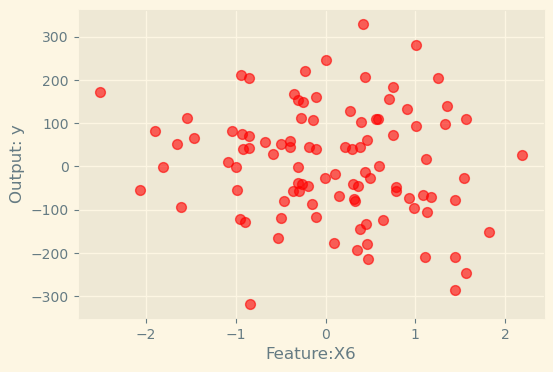

In [ ]:
with plt.style.context(('Solarize_Light2')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.scatter(df[col],df['y'],c='red',s=50,alpha=0.6)

#### Puede ser visto en los gráficos de dispersión que algunas de las características influyen en la salida mientras que otras no. Este es el resultado de elegir un *n_informativo* particular en el método *make_regression*

#### Histogramas del espacio de características

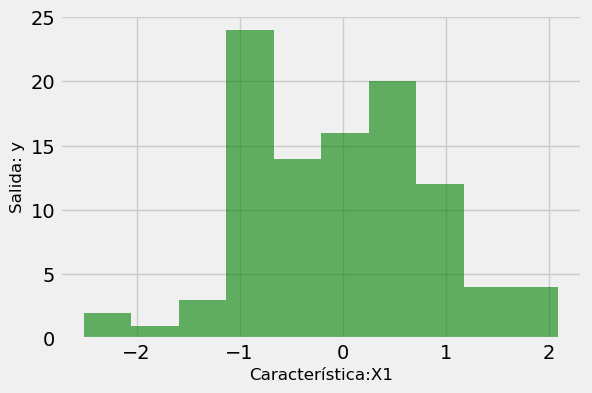

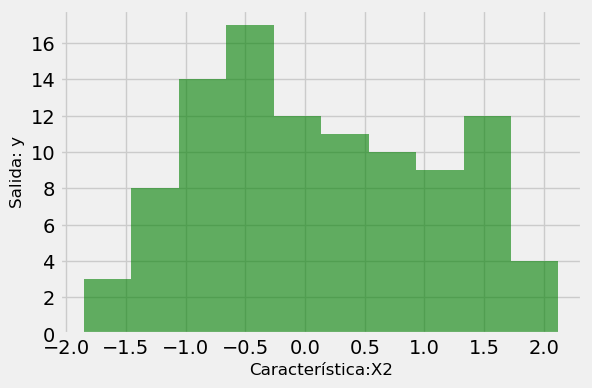

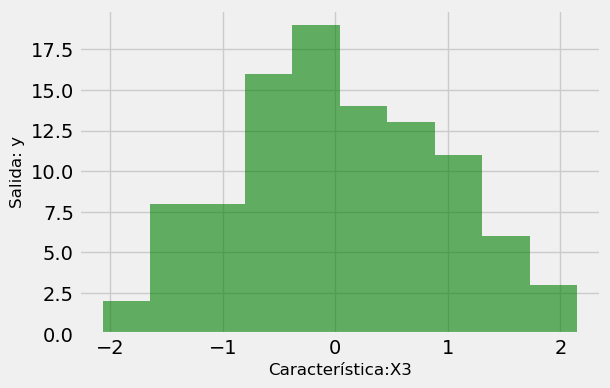

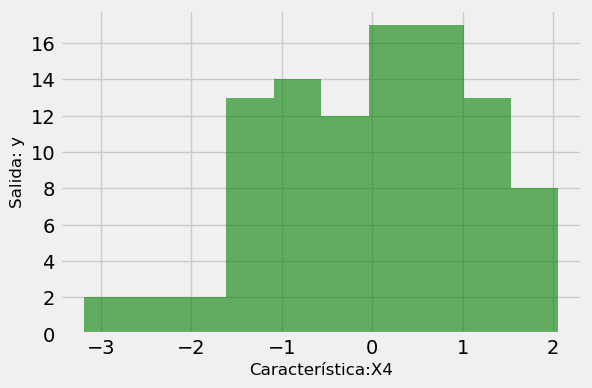

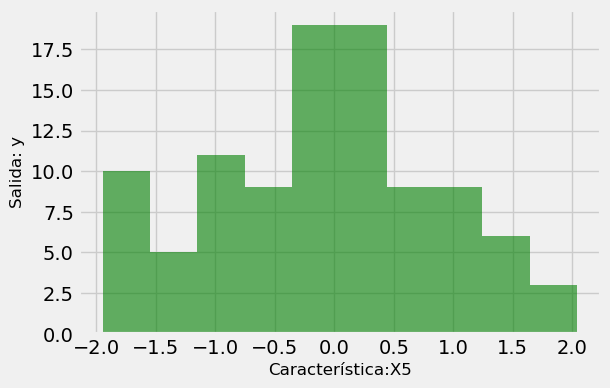

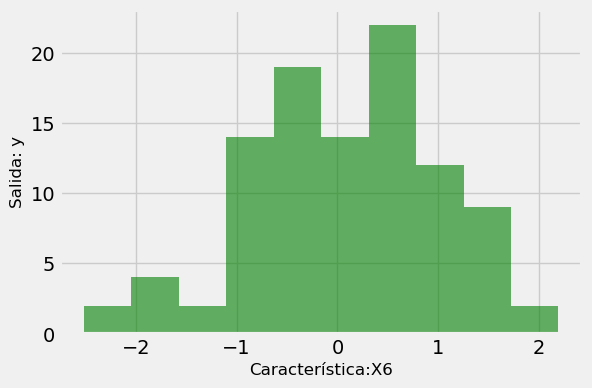

In [ ]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Característica:'+col,fontsize=12)
        plt.ylabel('Salida: y',fontsize=12)
        plt.hist(df[col],alpha=0.6,facecolor='g')

## ¿Cómo funcionará un regresor de árbol de decisión?

Cada ejecución generará un resultado diferente, pero en la mayoría de las ocasiones, **es probable que el regresor del árbol de decisión único aprenda características espurias**, es decir, asignará poca importancia a características que no son regresores verdaderos.

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
tree_model = tree.DecisionTreeRegressor(max_depth=5,random_state=10)
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=10)

Mean square error (MSE): 7931.574768958282


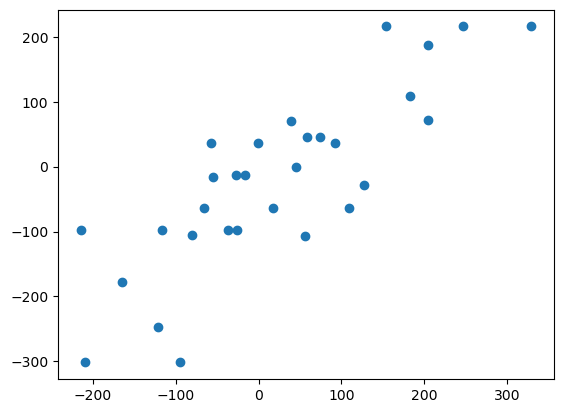

In [ ]:
from sklearn import metrics
test_pred = tree_model.predict(X_test)
plt.scatter(x=y_test, y = test_pred)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,test_pred))

Importancia relativa de las características:  [0.26900246 0.53730467 0.11075698 0.03758107 0.01219288 0.03316193]


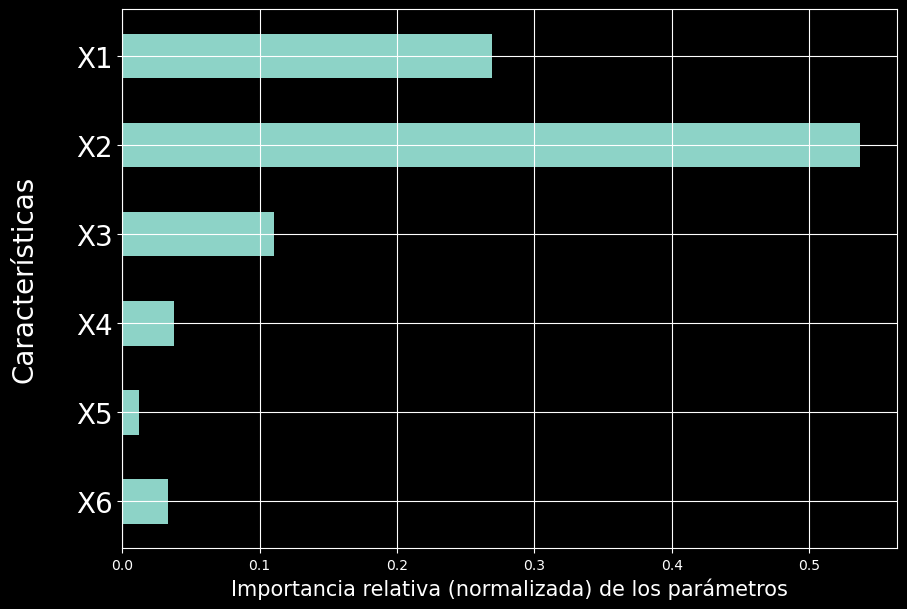

In [ ]:
print("Importancia relativa de las características: ",tree_model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Importancia relativa (normalizada) de los parámetros",fontsize=15)
    plt.ylabel("Características\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=tree_model.feature_importances_,height=0.5)


#### Imprimir la puntuación $R^2$ score del modelo de regresión de árbol de decisión

Aunque el puntaje de $ R ^ 2 $ es bastante alto, el modelo tiene algunas fallas porque ha asignado importancia a regresores que no tienen un significado real.

In [ ]:
print("Coeficiente de Regresión:",tree_model.score(X,y))

Coeficiente de Regresión: 0.8416342835073534


## Regresor de bosque aleatorio

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(max_depth=5, random_state=10, max_features='sqrt', max_leaf_nodes=5, n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', max_leaf_nodes=5,
                      random_state=10)

Mean square error (MSE): 6623.163646280274


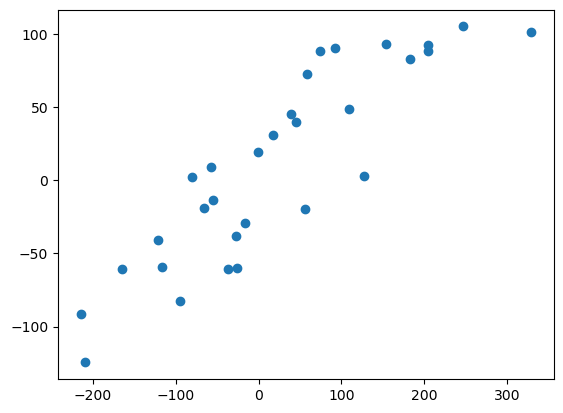

In [ ]:
test_pred = model.predict(X_test)
plt.scatter(x=y_test, y = test_pred)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,test_pred))

#### Imprimir la importancia relativa de las características

Importancia relativa de las características:  [0.19684046 0.47728167 0.17676252 0.02826586 0.03405289 0.08679659]


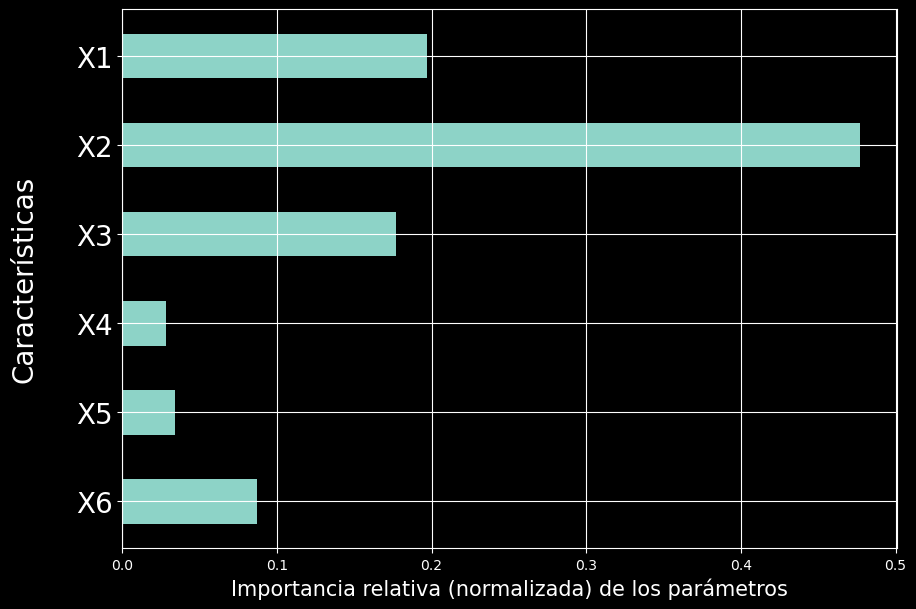

In [ ]:
print("Importancia relativa de las características: ",model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Importancia relativa (normalizada) de los parámetros",fontsize=15)
    plt.ylabel("Características\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=model.feature_importances_,height=0.5)

#### Imprimir la puntuación $R^2$ del modelo de regresión de bosque aleatorio

In [ ]:
print("Coeficiente de regresión:",model.score(X,y))

Coeficiente de regresión: 0.741122982021315


Valor del R cuadrado de este ajuste: 0.974
Mean square error (MSE): 426.4341939815899


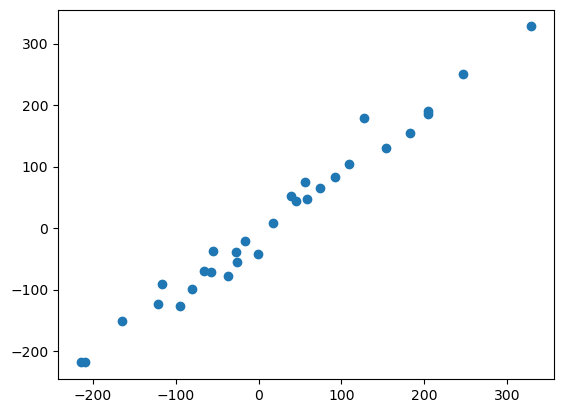

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()
lm.fit(X_train,y_train)
train_pred=lm.predict(X_train)
test_pred=lm.predict(X_test)
print("Valor del R cuadrado de este ajuste:",round(metrics.r2_score(y_train,train_pred),3))
plt.scatter(x=y_test, y = test_pred)
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,test_pred))
# va directo a encontrar los pesos con el menor error
# se resuleve unicamente con una ecuación


## Benchmark to statsmodel (solución ordinaria de mínimos cuadrados por método analítico exacto)

[Statsmodel es un módulo de Python] (http://www.statsmodels.org/dev/index.html) que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y exploración de datos estadísticos .

In [ ]:
import statsmodels.api as sm

In [ ]:
Xs=sm.add_constant(X)
stat_model = sm.OLS(y,Xs)
stat_result = stat_model.fit()

In [ ]:
print(stat_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     628.6
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           5.97e-73
Time:                        15:16:19   Log-Likelihood:                -440.25
No. Observations:                 100   AIC:                             894.5
Df Residuals:                      93   BIC:                             912.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8565      2.087     -1.848      0.0

#### Hacer matrices de coeficientes de regresión estimados por los modelos

In [ ]:
rf_coef=np.array(coef)
stat_coef=np.array(stat_result.params[1:])

#### Mostramos los verdaderos coeficientes de regresión (como los devuelve la función del generador) y los coeficientes estimados del modelo MCO uno al lado del otro

In [ ]:
df_coef = pd.DataFrame(data=[rf_coef,stat_coef],columns=df.columns[:-1],index=['True Regressors', 'OLS method estimation'])
df_coef

,X1,X2,X3,X4,X5,X6
True Regressors,78.586387,97.723610,52.306063,0.000000,0.000000,0.000000
OLS method estimation,76.405734,96.022244,57.330248,-0.902453,-0.234568,-3.279878


### Mostramos la importancia relativa de los regresores uno al lado del otro

Para el modelo de bosque aleatorio, mostramos la importancia relativa de las características según lo determinado por el metaestimador. Para el modelo MCO, muestre valores estadísticos t normalizados.

**Quedará claro que aunque el regresor RandomForest identifica correctamente los regresores importantes, no les asigna el mismo nivel de importancia relativa que el método MCO del estadístico t**

In [ ]:
df_importance = pd.DataFrame(data=[model.feature_importances_,stat_result.tvalues[1:]/sum(stat_result.tvalues[1:])],
                             columns=df.columns[:-1],
                             index=['RF Regressor relative importance', 'OLS method normalized t-statistic'])
df_importance

,X1,X2,X3,X4,X5,X6
RF Regressor relative importance,0.196840,0.477282,0.176763,0.028266,0.034053,0.086797
OLS method normalized t-statistic,0.324434,0.449181,0.246862,-0.004894,-0.001070,-0.014514


## Exploraciones adicionales

Juega con los hiperparámetros de los modelos, p. Ej. profundidad del árbol, cantidad de hojas, estrategia de división, número de árboles en el bosque, etc. para ver cómo se comporta el modelo de regresión. Además, juegue con la naturaleza y la complejidad del generador de muestras escribiendo su propia función no lineal.